In this activity, we will look at the KNN model with a simple example of a network simulation through a graph. This example can be related to network anamoly detection using KNN.

The activity has a total of 6 Steps.

Step 1: Install and import the lbraries

In [ ]:
%pip install networkx

import networkx as nx
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

Step 2: The function below creates a synthetic graph. \
A synthetic graph is a graph that is not derived from real-world data but is instead created using a generative model. This means that the graph's structure and properties are determined by the model's parameters, which can be set to reflect the desired characteristics of the graph.\
While creating the graph, we will induce an anomaly to train and test the model.

In [14]:
# Function to generate a synthetic graph with an anomaly
def generate_synthetic_graph():
    G = nx.erdos_renyi_graph(20, 0.1)  # Generate a random graph (you can adjust parameters)

    # Introduce an anomaly by adding an edge not following the normal pattern
    anomaly_edge = (5,25)
    G.add_edge(*anomaly_edge)

    return G

Step 3: The function below visualizes the sunthetic graph generated with the above function.

In [11]:
# Function to visualize the graph
def visualize_graph(G, anomaly_edge=None):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=8, font_color='black')

    if anomaly_edge:
        nx.draw_networkx_edges(G, pos, edgelist=[anomaly_edge], edge_color='red', width=2)

    plt.show()

Step 4: The function below is used for detecting the anamolies with KNN. First the features are extracted from the graph like the degree of each node. Then the KNN is used to identify anomalies and assign a score based on the distances.

In [12]:
# Function to detect anomalies using KNN
def detect_anomalies(G, k=5):
    # Extract graph features (e.g., node degrees)
    features = np.array(list(dict(G.degree).values())).reshape(-1, 1)

    # Use KNN to identify anomalies
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(features)
    distances, indices = nbrs.kneighbors(features)

    # Calculate anomaly score based on distances
    anomaly_scores = distances[:, -1]

    return anomaly_scores

Step 5: The function below is used to call the functions above and for enumerating the anomaly scores.

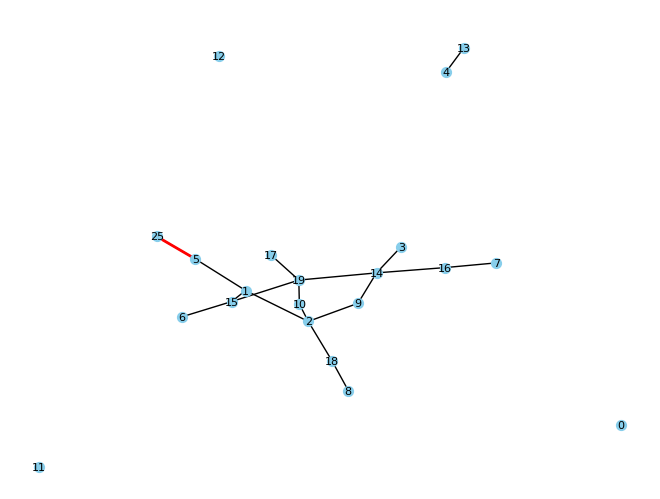

Node 0: Anomaly Score = 1.0000
Node 1: Anomaly Score = 1.0000
Node 2: Anomaly Score = 1.0000
Node 3: Anomaly Score = 0.0000
Node 4: Anomaly Score = 0.0000
Node 5: Anomaly Score = 0.0000
Node 6: Anomaly Score = 0.0000
Node 7: Anomaly Score = 0.0000
Node 8: Anomaly Score = 0.0000
Node 9: Anomaly Score = 0.0000
Node 10: Anomaly Score = 0.0000
Node 11: Anomaly Score = 1.0000
Node 12: Anomaly Score = 1.0000
Node 13: Anomaly Score = 0.0000
Node 14: Anomaly Score = 1.0000
Node 15: Anomaly Score = 1.0000
Node 16: Anomaly Score = 0.0000
Node 17: Anomaly Score = 0.0000
Node 18: Anomaly Score = 0.0000
Node 19: Anomaly Score = 1.0000
Node 20: Anomaly Score = 0.0000


In [13]:
# Main function
def main():
    # Generate a synthetic graph
    G = generate_synthetic_graph()

    # Visualize the graph with the anomaly
    visualize_graph(G, anomaly_edge=(5, 25))

    # Detect anomalies using KNN
    anomaly_scores = detect_anomalies(G, k=5)

    # Print anomaly scores for each node
    for i, score in enumerate(anomaly_scores):
        print(f"Node {i}: Anomaly Score = {score:.4f}")

if __name__ == "__main__":
    main()

Step 6: Analyse the output to observe the anomalies.

Note: Step 5 can be run repeatedly to generate multiple graphs and calculating the anomaly scores.